In [1]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight  
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt
from PIL import Image, ImageFile
import os
import warnings
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
test_dataset = r'D:\A.I. Project\archive\DATASET\DATASET\TEST'
test_bio = os.path.join(test_dataset, 'O')
test_non_bio = os.path.join(test_dataset, 'R')
train_dataset = r'D:\A.I. Project\archive\DATASET\DATASET\TRAIN'
train_bio = os.path.join(train_dataset, 'O')
train_non_bio = os.path.join(train_dataset, 'R')


In [3]:
batch_size = 32
IMAGE_SIZE = (224, 224)
image_height = 224
image_width = 224

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


train_data = train_datagen.flow_from_directory(
    train_dataset,
    target_size=(image_height,image_width),
    batch_size=batch_size,
    class_mode='binary', 
)

y_train = train_data.classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
print("Computed Class Weights:", class_weights)


Found 2513 images belonging to 2 classes.
Computed Class Weights: {0: 0.8968593861527481, 1: 1.1299460431654675}


In [5]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_data = test_datagen.flow_from_directory(
    test_dataset,
    target_size=(image_height,image_width),
    batch_size=batch_size,
    class_mode='binary',  
    shuffle=False  
)


Found 2513 images belonging to 2 classes.


In [6]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(*IMAGE_SIZE, 3))
base_model.trainable = False


In [7]:
model = Sequential([
    Input(shape=(image_height,image_width, 3)),  # Input layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [8]:
model.compile(
    optimizer='adam',               
    loss='binary_crossentropy',      
    metrics=['accuracy'] 
)

In [22]:
epochs = 6


history=model.fit(
    train_data,
    validation_data=test_data,
    epochs=epochs,
)

Epoch 1/6
79/79 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.8634 - loss: 0.3599 - val_accuracy: 0.8540 - val_loss: 0.3543
Epoch 2/6
79/79 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.8834 - loss: 0.2932 - val_accuracy: 0.9208 - val_loss: 0.1980
Epoch 3/6
79/79 ━━━━━━━━━━━━━━━━━━━━ 280s 4s/step - accuracy: 0.9151 - loss: 0.2285 - val_accuracy: 0.9208 - val_loss: 0.2115
Epoch 4/6
79/79 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.9004 - loss: 0.2407 - val_accuracy: 0.9109 - val_loss: 0.2058
Epoch 5/6
79/79 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.9212 - loss: 0.2017 - val_accuracy: 0.9339 - val_loss: 0.1715
Epoch 6/6
79/79 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.9165 - loss: 0.2223 - val_accuracy: 0.9383 - val_loss: 0.1538


In [24]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 282ms/step - accuracy: 0.9645 - loss: 0.0907
Test Accuracy: 93.83%


In [26]:
model.save("waste_classification_model.h5")
print("Model trained and saved successfully.")


Model trained and saved successfully.


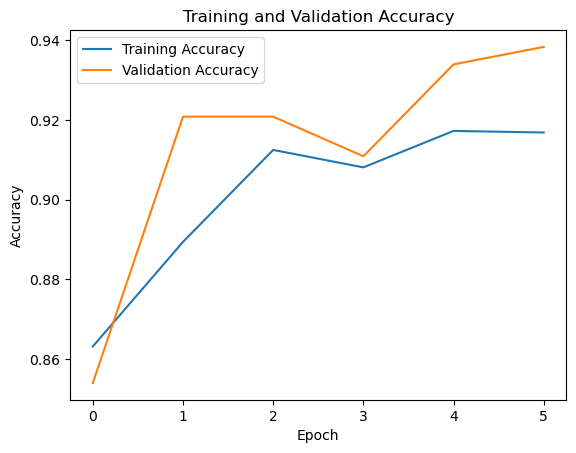

In [28]:
# import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
Classified as: Biodegradable, Confidence: 0.07


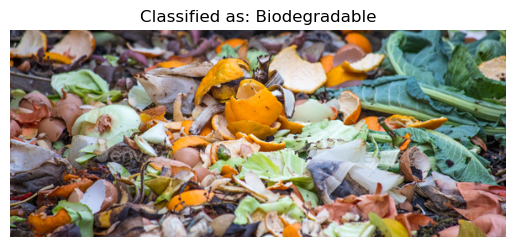

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

model = load_model("waste_classification_model.h5")
image_height = 224
image_width = 224

def classify_image(image_path):
    img = load_img(image_path, target_size=(image_height, image_width))  
    img_array = img_to_array(img) / 255.0  # Normalize image
    img_array = np.expand_dims(img_array, axis=0)  
    prediction = model.predict(img_array)[0][0]  
    label = "Biodegradable" if prediction < 0.5 else "Non-biodegradable"
    return label, prediction

image_path = r"C:\Users\dhruv\OneDrive\Desktop\test_image.jpeg"

label, confidence = classify_image(image_path)
print(f"Classified as: {label}, Confidence: {confidence:.2f}")
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open(image_path)
plt.imshow(img)
plt.title(f"Classified as: {label}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Classified as: Non-biodegradable, Confidence: 0.59


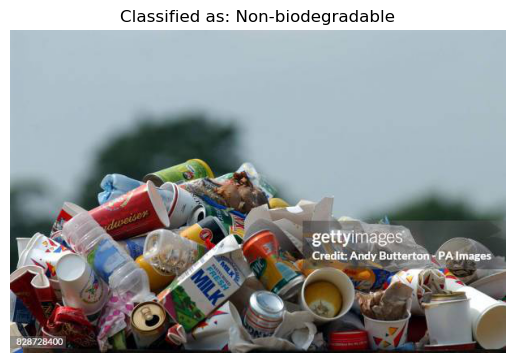

In [3]:
image_path = r"C:\Users\dhruv\OneDrive\Desktop\test_image2.jpg"

label, confidence = classify_image(image_path)
print(f"Classified as: {label}, Confidence: {confidence:.2f}")
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open(image_path)
plt.imshow(img)
plt.title(f"Classified as: {label}")
plt.axis('off')
plt.show()